<a href="https://colab.research.google.com/github/OswaldVc/Arduino/blob/main/TP9/Factores_del_comportamiento_humano_Patio_Tierra_Buena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


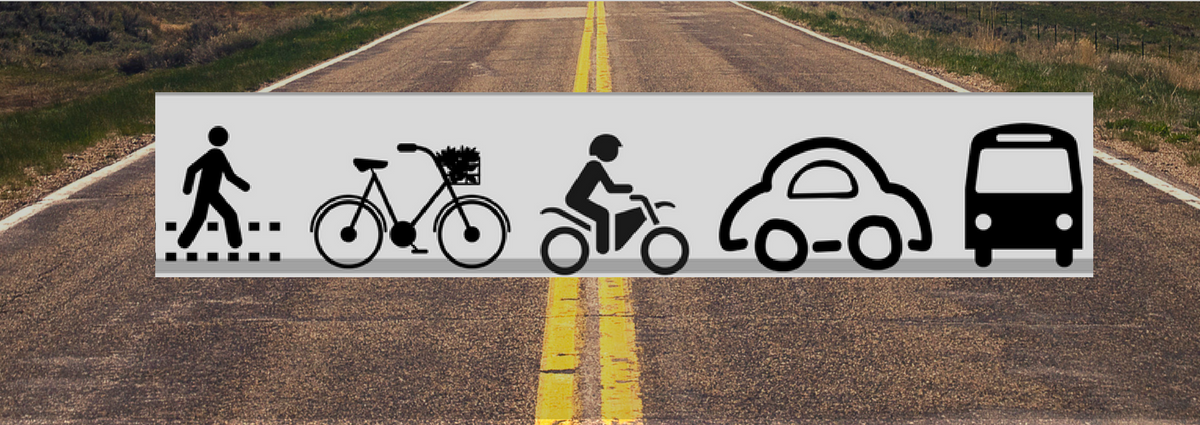

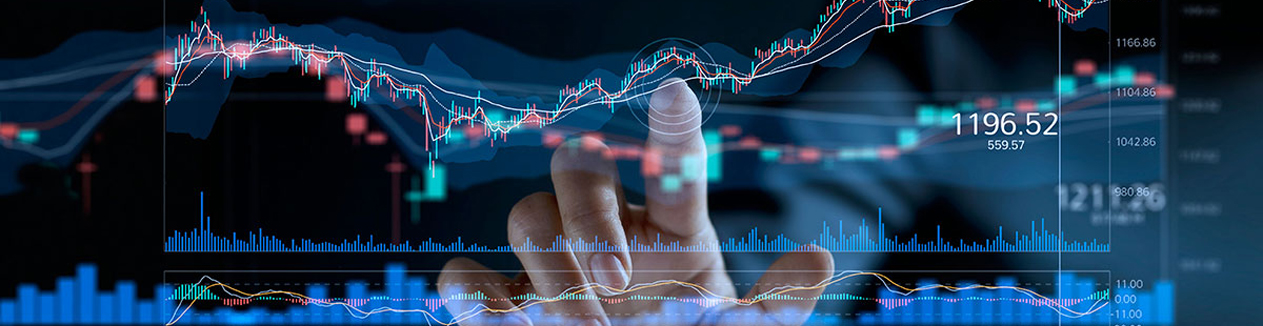

***Autores:***

- Socióloga Diana C. Garavito A.
- Ingeniero Néstor O. Vásquez C.


***¿Qué factores están impulsando la accidentalidad vial en la compañia Masivo Capital?***

# ***Librerias y Lectura de DataFrame***

In [ ]:
# ------- Importación de Módulos ------------

import matplotlib.pyplot as plt
from datetime import datetime
from locale import normalize
from datetime import date
import missingno as msno

import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.express    as px
import warnings
import seaborn
import pandas as pd
import numpy  as np

import folium
from folium.plugins import HeatMap
import pandas as pd

sns.set_style("darkgrid")
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

url_base ="https://raw.githubusercontent.com/OswaldVc/BDD/main/Tierra_Buena.xlsx"
df = pd.read_excel(url_base)

##***Limpieza de datos***

In [ ]:
####Filtro para renombrar la features de acuerdo a tabla de Códigos .###########
################################################################################


df_new = df.rename(columns={"ID":"AAB01","HORA DE INICIO":"AAB02","HORA FINALIZACION":"AAB03","CORREO ELECTRONICO":"AAB04","NOMBRE":"AAB05",
                            "¿ACEPTA PARTICIPAR EN EL ESTUDIO DE INVESTIGACIÓN DE MANERA LIBRE Y VOLUNTARIA?":"AAB06","FECHA EN QUE SE DILIGENCIA LA ENCUESTA":"AAB07",
                            "CARGO":"CARGO","PATIO ASIGNADO":"PATIO","EDAD":"EDAD","SEXO":"GENERO","NIVEL DE ESCOLARIDAD TERMINADO":"NIVEL ACADEMICO","ANTIGUEDAD CONDUCIENDO":"ANTIGUEDAD CONDUCIENDO",
                            "EXPERIENCIA ANTERIOR":"EXPERIENCIA ANTERIOR", "ESTADO CIVIL":"ESTADO CIVIL","¿CUÁL ES EL ESTRATO QUE REGISTRA EN SU RECIBO PÚBLICO?":"ESTRATO", "NÚMERO DE HIJOS":"HIJOS", 
                            "¿ES USTED PADRE O MADRE CABEZA DE HOGAR?, DEFINIDO COMO LA PERSONA QUE ASUME EN FORMA EXCLUSIVA Y SIN APOYO ALGUNO LA RESPONSABILIDAD DEL HOGAR.":"AAB18", 
                            "¿EN QUÉ ACTIVIDADES DEDICA SU TIEMPO LIBRE?":"AAB19","¿QUE TIPO DE TRABAJO?":"AAB20", "COMUNICACIÓN EN REPORTE DE NOVEDADES (CENTRO CONTROL)":"AAB21",
                            "ATENCIÓN DE CASOS EN VÍA (TÉCNICOS DE SEGURIDAD VIAL)":"AAB22","OPERACIONES (JEFES DE PATIO)":"AAB23","ALISTAMIENTO DE VEHÍCULOS (PERSONAL DE MANTENIMIENTO)":"AAB24",
                            "APOYO A NOVEDADES (AUXILIARES PIR)":"AAB25","OPERACIONES (DEMÁS OPERADORES)":"AAB26",
                            "¿REPORTA A SU JEFE INMEDIATO CUANDO ESTÁ PRESENTANDO PROBLEMAS O MOLESTIAS DE SALUD (FATIGA, ESTRÉS, ANSIEDAD, ENTRE OTROS)?":"AAB27",
                            "¿EN SU LABOR ASUME POSTURAS QUE SOBRE ESFUERZAN LA ESPALDA, BRAZOS, PIERNAS, CUELLO O CABEZA?":"AAB28",
                            "¿TRABAJA EN POSICIÓN ENCOGIDA O INCÓMODA (ENCORVARSE O TRABAJAR EN ESPACIOS PEQUEÑOS)?":"AAB29",
                            "¿REALIZA PAUSAS ACTIVAS DESPUÉS DE REALIZAR UN TRAYECTO QUE IMPLIQUE LARGA DURACIÓN?":"AAB30",
                            "¿LAS HORAS MÍNIMAS QUE DUERME ESTÁN ENTRE 7 – 8 HORAS?":"AAB31","¿EN GENERAL, MANTIENE UNA DIETA BALANCEADA EN SU ALIMENTACIÓN (FRUTAS, VERDURAS, PROTEÍNAS)?":"AAB32",
                            "¿DURANTE SU JORNADA LABORAL, BEBE PEQUEÑOS SORBOS DE AGUA PARA MANTENERSE HIDRATADO?":"AAB33", "¿USA LENTES O GAFAS?":"AAB34","¿REALIZA LOS CONTROLES MÉDICOS?":"AAB35",
                            "¿SUFRE DE ALGUNA ENFERMEDAD?":"AAB36","¿QUÉ TIPO DE ENFERMEDAD PADECE?":"AAB37","¿QUÉ TIPO DE MEDICAMENTOS CONSUME PARA TRATAR LA ENFERMEDAD?":"AAB38",
                            "¿CON QUE FRECUENCIA LOS CONSUME?":"AAB39","¿CONSUME ALCOHOL O NICOTINA?":"AAB40", "ALCOHOL":"AAB41","NICOTINA":"AAB42",
                            "¿ALGUNA VEZ EN SU VIDA HA CONSUMIDO ALGÚN TIPO DE DROGA PSICOACTIVA, ESTAS HACEN REFERENCIA A LAS DROGAS COMO LO SON LA MARIHUANA, LA COCAÍNA, ¿ENTRÉ OTRAS?":"AAB43",
                            "¿CUÁL DE LAS SIGUIENTES DROGAS PSICOACTIVAS SUELE CONSUMIR CON FRECUENCIA, ENTENDIDO FRECUENCIA COMO VARIOS DÍAS A LA SEMANA O DURANTE EL DÍA?":"ABB44",
                            "CONOCE USTED, ¿CUÁLES SON SUS FUNCIONES Y LOS DIFERENTES DESINCENTIVOS RELACIONADOS CON LA OPERACIÓN? (MULTAS POR CONDUCTAS OPERACIONALES, PERIODOS DE RECAPACITACIÓN)":"DESINCENTIVOS_OPERACION",
                            "¿QUÉ TAN SATISFECHO SE ENCUENTRA CON EL PROTOCOLO DE DESINCENTIVOS RELACIONADOS CON LA OPERACIÓN?":"AAB46",
                            "¿CONSIDERA QUE CUENTA CON LAS HERRAMIENTAS NECESARIAS PARA LA EJECUCIÓN DE SU LABOR, EN CUANTO A VEHÍCULOS SEGUROS?":"AAB47",
                            "¿CUÁL ES LA RAZÓN?":"AAB48","¿CONSIDERA QUE CUENTA CON LAS HERRAMIENTAS NECESARIAS PARA LA EJECUCIÓN DE SU LABOR, EN CUANTO A CONOCIMIENTO Y ENTRENAMIENTO?":"AAB49",
                            "¿CUÁL ES LA RAZÓN?.1":"AAB50","¿DENTRO DE LA OBSERVACIÓN QUE USTED TIENE EN EL DESARROLLO DE SU LABOR, ORDENE DEL MÁS IMPORTANTE AL MENOS IMPORTANTE LOS ACTORES A LOS QUE LES PRESTA MAYOR ATENCIÓN EN LA VÍA?":"AAB51",
                            "¿DENTRO DE LA OBSERVACIÓN QUE USTED TIENE EN EL DESARROLLO DE SU LABOR, ¿INDIQUE SOLO UN FACTOR DEL MEDIO AMBIENTE AL QUE DEBE PRESTARLE MAYOR ATENCIÓN?":"AAB52",
                            "PARA USTED, ¿CUÁL CONSIDERA QUE ES EL FACTOR MÁS RELEVANTE EN LA PRODUCCIÓN DE UN SINIESTRO?":"AAB53",
                            "¿ANTES DE INICIAR OPERACIÓN REVISA EL ESTADO DE LOS ESPEJOS, LUCES Y LLANTAS DEL VEHÍCULO?":"AAB54",
                            "¿SE COLOCA EL CINTURÓN DE SEGURIDAD ANTES DE INICIAR EL RECORRIDO, AJUSTADO CON LOS TRES PUNTOS DE SEGURIDAD?":"AAB55",
                            "¿REALIZA DE FORMA ADECUADA EL PARQUEO DEL VEHÍCULO PARA EL INGRESO DE LOS PASAJEROS?":"AAB56",
                            "¿MANTIENE UNA VELOCIDAD PROMEDIO EN CONDICIONES NORMALES?":"AAB57","¿PERMITE EL PASO DE PEATONES?":"AAB58",
                            "¿CEDE EL PASO A VEHÍCULOS PARTICULARES O DE TRANSPORTE PÚBLICO?":"AAB59","¿ESTA ATENTO A LOS DIFERENTES ACTORES VIALES?":"AAB60",
                            "¿RESPETA LAS SEÑALES DE TRÁNSITO?":"AAB61", "¿REALIZA EL PARE EN LUGARES SEÑALADOS?":"AAB62","¿SE DETIENE CUANDO EL SEMÁFORO PASA DE AMARILLO A ROJO?":"AAB63",
                            "¿CRUZA CON PRECAUCIÓN EN INTERVENCIONES VIALES?":"AAB64","¿UBICA CORRECTAMENTE EL VEHÍCULO EN EL CARRIL?":"AAB65","¿ENCIENDE LUCES EN APROXIMACIÓN A PARADEROS?":"AAB66",
                            "¿EVITA MANIOBRAS PELIGROSAS?":"AAB67","¿USA LOS ESPEJOS Y REVISA LOS PUNTOS CIEGOS CUANDO CAMBIA DE CARRIL? ":"AAB68",
                            "¿OPERA EL VEHÍCULO SIN DISTRACCIONES (USO DEL TELÉFONO CELULAR, AUDÍFONOS O MANTENER UNA CONVERSACIÓN)?":"AAB69","¿MANTIENE LIBRE LA UNIDAD?":"AAB70",
                            "¿EJECUTA MANIOBRAS COMO RESPUESTA A ESTÍMULOS VIALES?  ":"AAB71","¿OPERA EL VEHÍCULO EN MOVIMIENTO CON LAS PUERTAS CERRADAS?":"AAB72",
                            "¿EVITA FRENADAS BRUSCAS?":"AAB73","¿ANTE NOVEDADES EN LA VÍA,REALIZA REPORTE DESDE LA UNIDAD LÓGICA A CENTRO DE CONTROL?":"AAB74",
                            "¿CONDUCE UN VEHÍCULO SABIENDO PREVIAMENTE QUE PRESENTA UNA FALLA MECÁNICA?":"AAB75","¿SE DEJA CONTROLAR FÁCILMENTE POR LOS DESEOS MÁS QUE POR LA LÓGICA?":"AAB76",
                            "¿SE SIENTE ACTIVO EN SU JORNADA LABORAL?":"AAB77","¿LE GUSTA MANTENER ORDEN EN EL DESARROLLO DE SU LABOR?":"AAB78",
                            "¿ANTE SITUACIONES DE ALTO ESTRÉS SIENTE BLOQUEARSE AL BUSCAR UNA SOLUCIÓN?":"AAB79",
                            "¿SE MOLESTA CON FRECUENCIA ANTE LAS ACCIONES QUE EMPRENDE UN TERCERO?":"AAB80",
                            "¿AL MOMENTO DE EMPRENDER SU LABOR SIGUE SIEMPRE UN PROCESO?":"AAB81","¿LE CUESTA EXPRESAR EMOCIONES CUANDO TIENE UNA SITUACIÓN QUE LO ESTÁ PREOCUPANDO?":"AAB82",
                            "¿SE PREOCUPA CON FACILIDAD ANTE UNA NOVEDAD EN VÍA (ALTO TRÁFICO, ESTADO DE LA VÍA, DEMANDA DE USUARIOS)?":"AAB83",
                            "¿PERCIBE FÁCILMENTE LAS EMOCIONES Y LOS PENSAMIENTOS DE LOS TERCEROS?":"AAB84","¿SE LE DIFICULTA CONTROLAR LOS SENTIMIENTOS NEGATIVOS?":"AAB85",
                            "¿EN UNA SITUACIÓN CONFLICTIVA ENCUENTRA FÁCILMENTE UNA SOLUCIÓN?":"AAB86","¿EN LO CORRIDO DEL AÑO HA PRESENTADO ACCIDENTE DE TRÁNSITO?":"AAB87",
                            "ACCIDENTE SIMPLE":"ACCIDENTE_SIMPLE","ACCIDENTE CON LESIONADO":"ACCIDENTE_CON_LESIONADO","ACCIDENTE CON PERSONA MUERTA":"ACCIDENTE_CON_MUERTO", 
                            "PARA USTED, ¿CUÁL CONSIDERA QUE FUE EL FACTOR PREDOMINANTE EN EL MOMENTO DEL ÚLTIMO ACCIDENTE PRESENTADO?":"AAB91",
                            "EN EL MOMENTO DEL ÚLTIMO EVENTO PRESENTADO, ¿CUÁNTAS HORAS LLEVABA LABORANDO?":"AAB92",
                            "DE LOS SIGUIENTES FACTORES, ¿CUÁL CONSIDERA QUE IMPACTO EN EL EVENTO DEL ACCIDENTE?":"AAB93",
                            "¿CONSIDERA QUE PUDO HABER EJECUTADO ALGUNA ACCIÓN EVASIVA FRENTE AL EVENTO?":"AAB94",
                            "¿QUÉ TIPO DE ACCIÓN CONSIDERA QUE PUEDO HABER REALIZADO?":"AAB95",
                            "¿ANTES DEL EVENTO SE ENCONTRABA REALIZANDO ALGUNA ACTIVIDAD DIFERENTE A LA CONDUCCIÓN?":"AAB96",
                            "¿QUÉ TIPO DE ACCIÓN SE ENCONTRABA REALIZADO?":"AAB97",
                            "EN EL MOMENTO DEL EVENTO, ¿CUÁL FUE SU PRIMERA REACCIÓN? ":"AAB98",
                            "¿CUÁL ES SU NIVEL DE RESPONSABILIDAD FRENTE AL EVENTO?":"AAB99",
                            "¿CONSIDERA QUE ANTE EL EVENTO QUEDO ALGÚN APRENDIZAJE?":"AAB100",
                            "¿CUÁL FUE EL APRENDIZAJE QUE LE QUEDO?":"AAB101",
                            "¿CONSIDERA QUE LA EMPRESA LE HA BRINDADO LAS HERRAMIENTAS NECESARIAS PARA PODER EVITAR ACCIDENTES EN VÍA?":"AAB102",
                            "¿CUÁLES HERRAMIENTAS CONSIDERA QUE LE HACEN FALTA PARA EVITAR LA ACCIDENTALIDAD?":"AAB103",
                            "EL USO DE EQUIPOS ELECTRÓNICOS ES UNA DE LAS INFRACCIONES MÁS RECURRENTES, EN ESPECIAL EL USO DEL TELÉFONO MÓVIL, ¿CUÁL CREE USTED QUE PODRÍA SER UNA SOLUCIÓN A ESTA CONDUCTA?":"AAB104",
                            "OTRA DE LAS CONDUCTAS SON NO CUMPLIR CON LAS PARADAS ESTABLECIDAS EN EL ITINERARIO DE LA OPERACIÓN ¿CUÁL CREE USTED QUE PODRÍA SER UNA SOLUCIÓN A LA OMISIÓN DE LAS PARADAS?":"AAB105",
                            "EL EXCESO DE VELOCIDAD ES OTRO DE LOS FACTORES QUE GENERAN INFRACCIÓN ANTE EL ENTE GESTOR, ¿CUÁL CONSIDERA USTED QUE ES UNA BUENA PRÁCTICA PARA MITIGAR EL EXCESO DE VELOCIDAD?":"AAB105"

                            })
                           
                        

In [ ]:
# ----- Selección de las características que se usarán en el proyecto. --------#

#### Filtro para seleccionar únicamente las Feature que aportan al análisis.####
################################################################################

Columnas = ['AAB07', 'CARGO', 'PATIO', 'EDAD', 'GENERO', 'NIVEL ACADEMICO', 'ANTIGUEDAD CONDUCIENDO','EXPERIENCIA ANTERIOR','ESTADO CIVIL','ESTRATO','HIJOS',"AAB18","AAB19",
            'AAB21', 'AAB22', 'AAB23', 'AAB24', 'AAB25', 'AAB26', 'AAB27', 'AAB28','AAB29','AAB30','AAB31',"AAB32","AAB33",'AAB34','AAB35','AAB36',"AAB37",
            'AAB40','AAB41',"AAB42","AAB43",'DESINCENTIVOS_OPERACION',"AAB46","AAB47","AAB48","AAB49","AAB50", "AAB51",
            'AAB52','AAB53',"AAB54","AAB55",'AAB56','AAB57',"AAB58","AAB59","AAB60","AAB61", "AAB62",
            'AAB63','AAB64',"AAB65","AAB66",'AAB67','AAB68',"AAB69","AAB70","AAB71","AAB72", "AAB73",
            'AAB74','AAB75',"AAB76","AAB77",'AAB78','AAB79',"AAB80","AAB81","AAB82","AAB83", "AAB84",
            'AAB85','AAB86',"AAB87","ACCIDENTE_SIMPLE",'ACCIDENTE_CON_LESIONADO','ACCIDENTE_CON_MUERTO',"AAB91","AAB92","AAB93","AAB94", "AAB95",
            'AAB96','AAB97',"AAB98","AAB99",'AAB100','AAB101',"AAB102","AAB103","AAB104","AAB105"
            ]

df_inf = df_new[Columnas]

In [ ]:
#### Filtro para categorizar el contenido de Feature AAB51 .####################
################################################################################

df_inf.loc[df_inf['AAB51']=='Bicitaxistas,Ciclistas,Motociclistas,Peatones,Usuarios,Carrosparticulares,Camiones ,Furgones ,Buses,Taxis', 'AAB51']=0
df_inf.loc[df_inf['AAB51']=='Bicitaxistas,Ciclistas,Peatones,Carrosparticulares,Camiones ,Furgones ,Motociclistas,Usuarios,Buses,Taxis', 'AAB51']=1
df_inf.loc[df_inf['AAB51']=='Peatones,Usuarios,Ciclistas,Motociclistas,Bicitaxistas,Carrosparticulares,Camiones ,Furgones ,Buses,Taxis', 'AAB51']=2
df_inf.loc[df_inf['AAB51']=='Ciclistas,Peatones,Motociclistas,Bicitaxistas,Usuarios,Carrosparticulares,Camiones ,Furgones ,Buses,Taxis', 'AAB51']=3
df_inf.loc[df_inf['AAB51']=='Usuarios,Ciclistas,Bicitaxistas,Peatones,Motociclistas,Buses,Taxis,Carrosparticulares,Camiones ,Furgones', 'AAB51']=4
df_inf.loc[df_inf['AAB51']=='Usuarios,Peatones,Ciclistas,Motociclistas,Bicitaxistas,Camiones,Furgones,Buses,Taxis,Carrosparticulares', 'AAB51']=5
df_inf.loc[df_inf['AAB51']=='Ciclistas,Motociclistas,Bicitaxistas,Carrosparticulares,Buses,Taxis,Camiones ,Furgones ,Usuarios,Peatones', 'AAB51']=6
df_inf.loc[df_inf['AAB51']=='Motociclistas,Bicitaxistas,Ciclistas,Peatones,Carrosparticulares,Buses,Taxis,Camiones ,Furgones ,Usuarios', 'AAB51']=7
df_inf.loc[df_inf['AAB51']=='Ciclistas,Carrosparticulares,Peatones,Camiones ,Furgones ,Motociclistas,Buses,Taxis,Usuarios,Bicitaxistas', 'AAB51']=8
df_inf.loc[df_inf['AAB51']=='Peatones,Ciclistas,Usuarios,Motociclistas,Bicitaxistas,Buses,Taxis,Carrosparticulares,Camiones ,Furgones', 'AAB51']=9
df_inf.loc[df_inf['AAB51']=='Ciclistas,Usuarios,Peatones,Carrosparticulares,Motociclistas,Bicitaxistas,Camiones ,Furgones ,Buses,Taxis', 'AAB51']=10
df_inf.loc[df_inf['AAB51']=='Peatones,Usuarios,Ciclistas,Motociclistas,Bicitaxistas,Carrosparticulares,Buses,Taxis,Camiones ,Furgones', 'AAB51']=11
df_inf.loc[df_inf['AAB51']=='Peatones,Ciclistas,Usuarios,Motociclistas,Carrosparticulares,Bicitaxistas,Camiones ,Furgones ,Buses,Taxis', 'AAB51']=12
df_inf.loc[df_inf['AAB51']=='Camiones,Furgones,Bicitaxistas,Usuarios,Ciclistas,Carrosparticulares,Peatones,Motociclistas,Buses,Taxis', 'AAB51']=13
df_inf.loc[df_inf['AAB51']=='Motociclistas,Bicitaxistas,Peatones,Usuarios,Ciclistas,Carrosparticulares,Camiones ,Furgones ,Buses,Taxis', 'AAB51']=14
df_inf.loc[df_inf['AAB51']=='Usuarios,Peatones,Ciclistas,Bicitaxistas,Motociclistas,Carrosparticulares,Buses,Taxis,Camiones ,Furgones', 'AAB51']=15
df_inf.loc[df_inf['AAB51']=='Usuarios,Peatones,Bicitaxistas,Ciclistas,Carrosparticulares,Camiones ,Furgones ,Buses,Taxis,Motociclistas', 'AAB51']=16
df_inf.loc[df_inf['AAB51']=='Peatones,Usuarios,Ciclistas,Bicitaxistas,Motociclistas,Carrosparticulares,Buses,Taxis,Camiones ,Furgones', 'AAB51']=17
df_inf.loc[df_inf['AAB51']=='Usuarios,Ciclistas,Peatones,Bicitaxistas,Motociclistas,Carrosparticulares,Buses,Taxis,Camiones ,Furgones', 'AAB51']=18
df_inf.loc[df_inf['AAB51']=='Usuarios,Bicitaxistas,Ciclistas,Peatones,Motociclistas,Carrosparticulares,Camiones ,Furgones ,Buses,Taxis', 'AAB51']=19
df_inf.loc[df_inf['AAB51']=='Peatones,Usuarios,Bicitaxistas,Ciclistas,Motociclistas,Buses,Taxis,Carrosparticulares,Camiones ,Furgones', 'AAB51']=20
df_inf.loc[df_inf['AAB51']=='Peatones,Usuarios,Ciclistas,Motociclistas,Carrosparticulares,Buses,Taxis,Camiones ,Furgones ,Bicitaxistas', 'AAB51']=21
df_inf.loc[df_inf['AAB51']=='Ciclistas,Bicitaxistas,Peatones,Motociclistas,Carrosparticulares,Camiones ,Furgones ,Usuarios,Buses,Taxis', 'AAB51']=22
df_inf.loc[df_inf['AAB51']=='Carrosparticulares,Buses,Taxis,Camiones,Furgones,Ciclistas,Peatones,Usuarios,Motociclistas,Bicitaxistas', 'AAB51']=23


#### Filtro para categorizar el contenido de Feature AAB52 .####################
################################################################################

df_inf.loc[df_inf['AAB52']=='Estado de la malla vial (existencia de peralte, puentes, alcantarillas, pendientes y abovedamiento de la vía)', 'AAB52']=100
df_inf.loc[df_inf['AAB52']=='Las condiciones meteorológicas (presencia de lluvia, niebla, humo, exposición a la luz y luminosidad)', 'AAB52']=200
df_inf.loc[df_inf['AAB52']=='Todas las anteriores', 'AAB52']=300


#### Filtro para categorizar el contenido de Feature AAB53 .####################
################################################################################

df_inf.loc[df_inf['AAB53']=='Factor Humano, hace referencia a la toma de decisión en la ejecución de maniobras sobre el vehículo', 'AAB53']=10
df_inf.loc[df_inf['AAB53']=='Factor Ambiental, hace referencia a las condiciones de la vía y condiciones meteorológicas', 'AAB53']=20
df_inf.loc[df_inf['AAB53']=='Factor Mecánico, hace referencia a las condiciones que tiene el vehículo', 'AAB53']=30


#### Filtro para categorizar el contenido de Feature ANTIGUEDAD CONDUCIENDO.####
################################################################################

df_inf.loc[df_inf['ANTIGUEDAD CONDUCIENDO']=='>  10 años', 'ANTIGUEDAD CONDUCIENDO']=11
df_inf.loc[df_inf['ANTIGUEDAD CONDUCIENDO']=='0 - 1 año', 'ANTIGUEDAD CONDUCIENDO']=1
df_inf.loc[df_inf['ANTIGUEDAD CONDUCIENDO']=='1 - 3 años', 'ANTIGUEDAD CONDUCIENDO']=2
df_inf.loc[df_inf['ANTIGUEDAD CONDUCIENDO']=='3 - 5 años', 'ANTIGUEDAD CONDUCIENDO']=4
df_inf.loc[df_inf['ANTIGUEDAD CONDUCIENDO']=='5 - 7 años', 'ANTIGUEDAD CONDUCIENDO']=6
df_inf.loc[df_inf['ANTIGUEDAD CONDUCIENDO']=='7 - 10 años', 'ANTIGUEDAD CONDUCIENDO']=8


df_inf.loc[df_inf['HIJOS']=='>4', 'HIJOS']=5


df_inf['ANTIGUEDAD CONDUCIENDO'] = pd.to_numeric(df_inf['ANTIGUEDAD CONDUCIENDO'])
df_inf['HIJOS'] = pd.to_numeric(df_inf['HIJOS'])

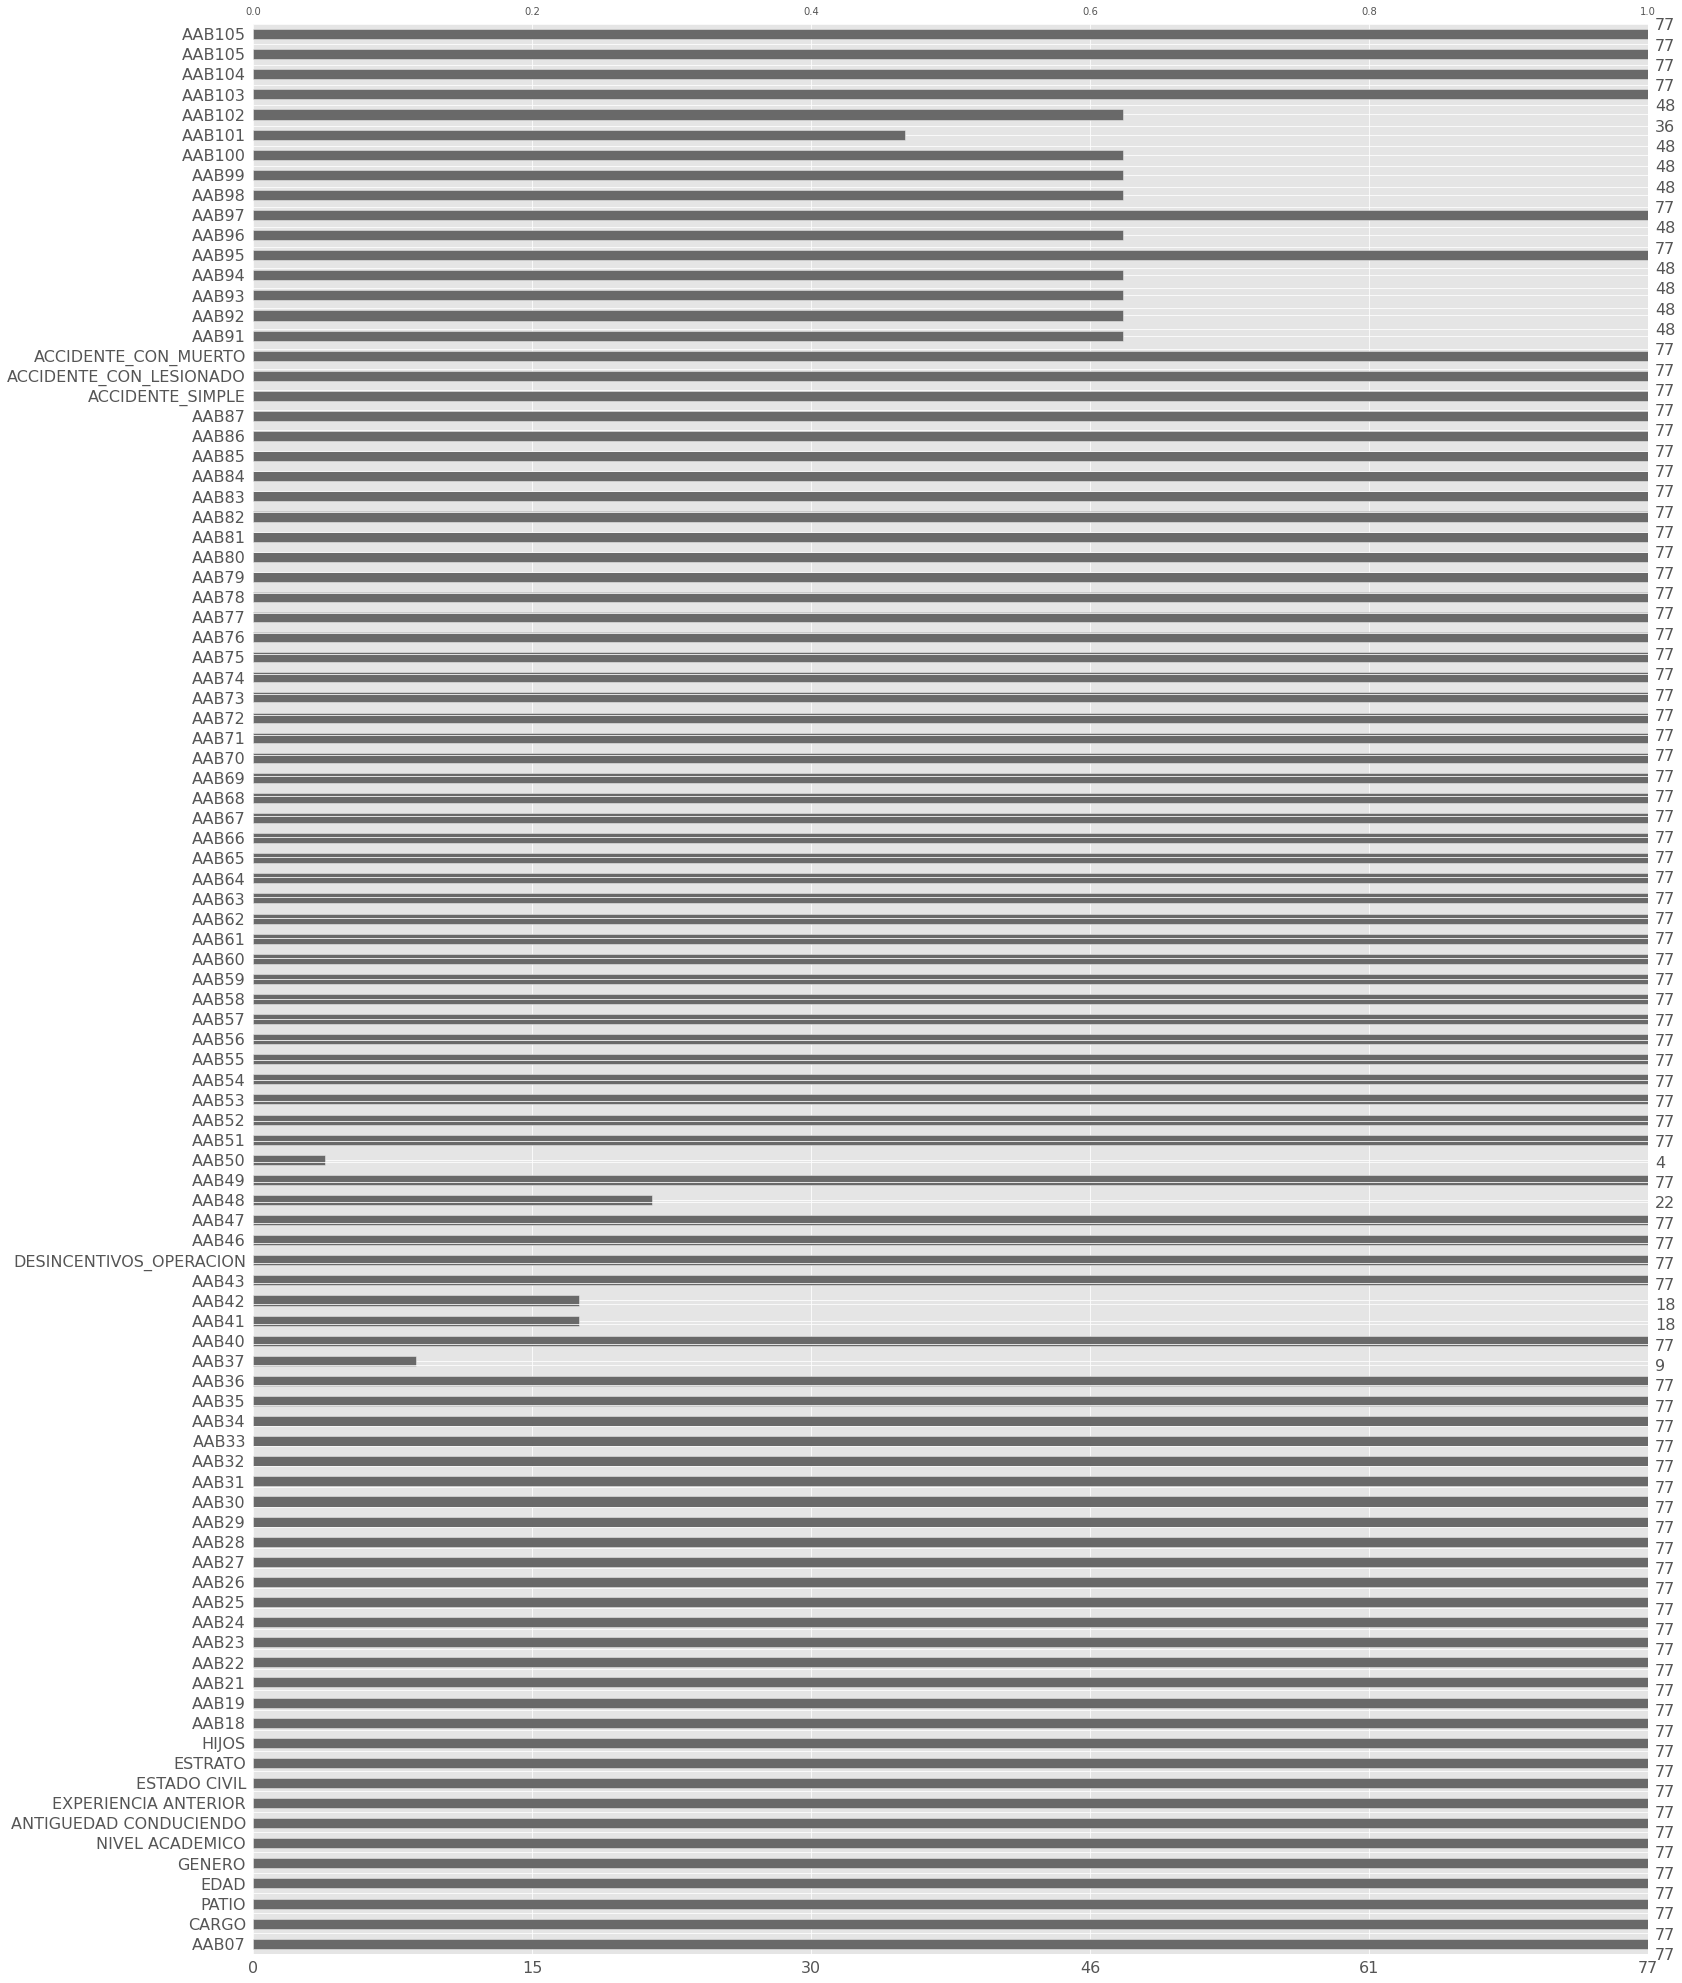

In [ ]:
msno.bar(df_inf);

#***Análisis descriptivo de la población encuestada - Patio Tierra Buena, Masivo Cpaital***

In [ ]:
df_inf.shape

(77, 96)

- se tienen 77 columnas, estas representan el contenido de las carácteristicas de las 96 variales registradas anteriormente.

In [ ]:
df_inf["GENERO"].value_counts()

Masculino    76
Femenino      1
Name: GENERO, dtype: int64

- En la encuesta participan 76 hombres y una mujer.

In [ ]:
df_inf["PATIO"].value_counts()

Tierra Buena    77
Name: PATIO, dtype: int64

- El total de ecuestados son 77 operadores

In [ ]:
df_inf["NIVEL ACADEMICO"].value_counts()

Bachillerato    57
Primaria        11
Técnico          7
Tecnólogo        2
Name: NIVEL ACADEMICO, dtype: int64

- De la población encuestada ***57*** funcionarios son bachilleres.
- ***11*** tienen la primaria.
- ***7*** son técnicos.
- ***2*** funcionarios son tecnólogos, en los resultados de la  encuesta no se registran profesionales.

In [ ]:
frec_abs_EDAD = df_inf["EDAD"].value_counts()
frec_abs_EDAD.rename("frec_abs_EDAD", inplace = True)
Frecuencia_relativa_EDAD = df_inf["EDAD"].value_counts(normalize = True)
Frecuencia_relativa_EDAD.rename("Frecuencia_relativa_EDAD", inplace = True)
Frecuencia_relativa_porcentual_EDAD= df_inf["EDAD"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_EDAD.rename("frec_rela_%", inplace = True)

tabla_frecuencia = pd.concat([frec_abs_EDAD,Frecuencia_relativa_EDAD,Frecuencia_relativa_porcentual_EDAD],axis=1)
total = pd.DataFrame(tabla_frecuencia.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia,total],axis = 0)


,frec_abs_EDAD,Frecuencia_relativa_EDAD,frec_rela_%
36-40,14.0,0.181818,18.181818
41-45,11.0,0.142857,14.285714
46-50,10.0,0.129870,12.987013
56-60,10.0,0.129870,12.987013
31-35,9.0,0.116883,11.688312
51-55,9.0,0.116883,11.688312
26-30,7.0,0.090909,9.090909
>61,4.0,0.051948,5.194805
18-25,3.0,0.038961,3.896104
TOTALES,77.0,1.000000,100.000000


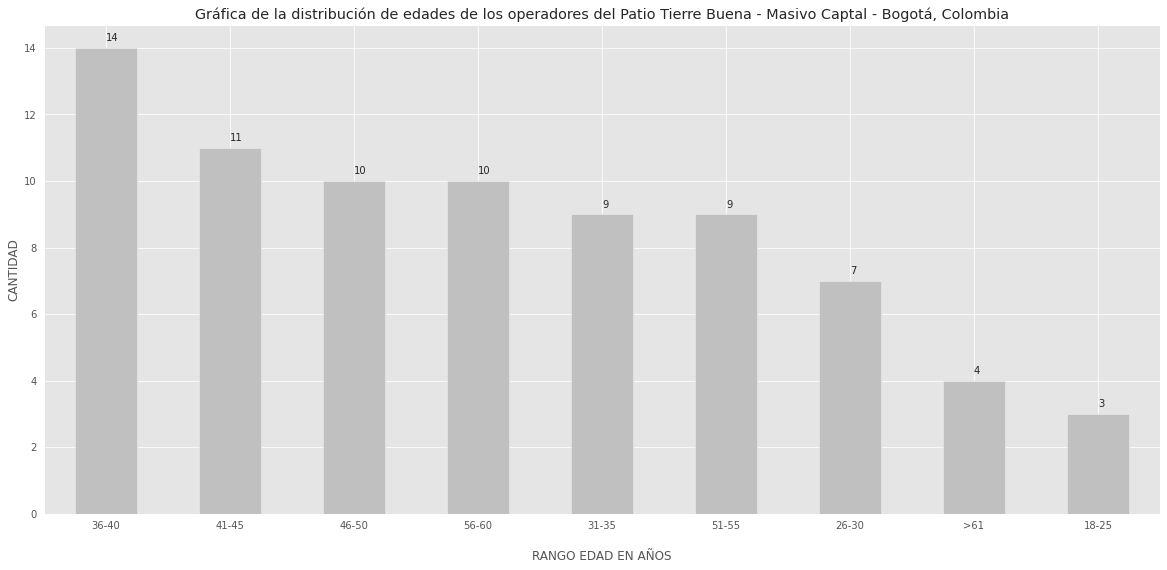

In [ ]:
plt.style.use("ggplot")   
plt.figure(figsize = (20,9))
plt.title("Gráfica de la distribución de edades de los operadores del Patio Tierre Buena - Masivo Captal - Bogotá, Colombia",) 
plt.xlabel("\nRANGO EDAD EN AÑOS")     
plt.ylabel("CANTIDAD") 
tabla_frecuencia["frec_abs_EDAD"].plot(kind="bar",color = "silver")

#ax = plt.axes()        
#ax.yaxis.grid()
#ax.xaxis.grid()

for label, annot in enumerate(tabla_frecuencia['frec_abs_EDAD']):  
  plt.annotate(str(annot),xy=(label,annot + 0.2))
#ax.set_facecolor('w')
plt.xticks(rotation = 0)
plt.show()

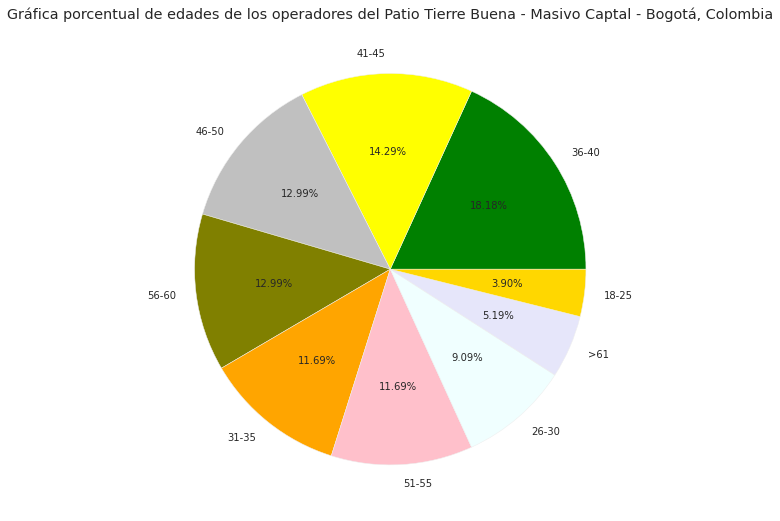

In [ ]:
## pie plot
plt.figure(figsize = (20,9))
plt.pie(tabla_frecuencia['frec_abs_EDAD'],labels = tabla_frecuencia.index,
        colors = ["Green", "Yellow", "Silver", "Olive", "orange", "pink", "Azure","Lavender","Gold",], autopct='%.2f%%')
plt.title("Gráfica porcentual de edades de los operadores del Patio Tierre Buena - Masivo Captal - Bogotá, Colombia",)
plt.show()

# De la información anterior podemos dar a conocer:

1. El rango de edad que sobre sale en el estudio son edades dentro del rango (36 a 40 años), lo anterior representa el ***18.18%*** de la población encuestada.

2. El rango de edad con menor presencia es de (18 a 25 años) con un ***3.9%***

#¿Que género tuvo mayor presencia?

In [ ]:

frec_abs = df_inf["GENERO"].value_counts()
frec_abs.rename("frec_abs", inplace = True)

Masculino    76
Femenino      1
Name: frec_abs, dtype: int64

In [ ]:
## Frecuencia relativa.
frec_rela = df_inf["GENERO"].value_counts(normalize = True)
frec_rela.rename("frec_rela", inplace = True)

Masculino    0.987013
Femenino     0.012987
Name: frec_rela, dtype: float64

In [ ]:
## Frecuencia Porcentual.
frec_rela_porcen = df_inf["GENERO"].value_counts(normalize = True)*100
frec_rela_porcen.rename("frec_rela_porcen", inplace = True)

Masculino    98.701299
Femenino      1.298701
Name: frec_rela_porcen, dtype: float64

In [ ]:
tabla_frecuencia = pd.concat([frec_abs,frec_rela,frec_rela_porcen],axis=1)
total = pd.DataFrame(tabla_frecuencia.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia,total],axis = 0)

,frec_abs,frec_rela,frec_rela_porcen
Masculino,76.0,0.987013,98.701299
Femenino,1.0,0.012987,1.298701
TOTALES,77.0,1.000000,100.000000


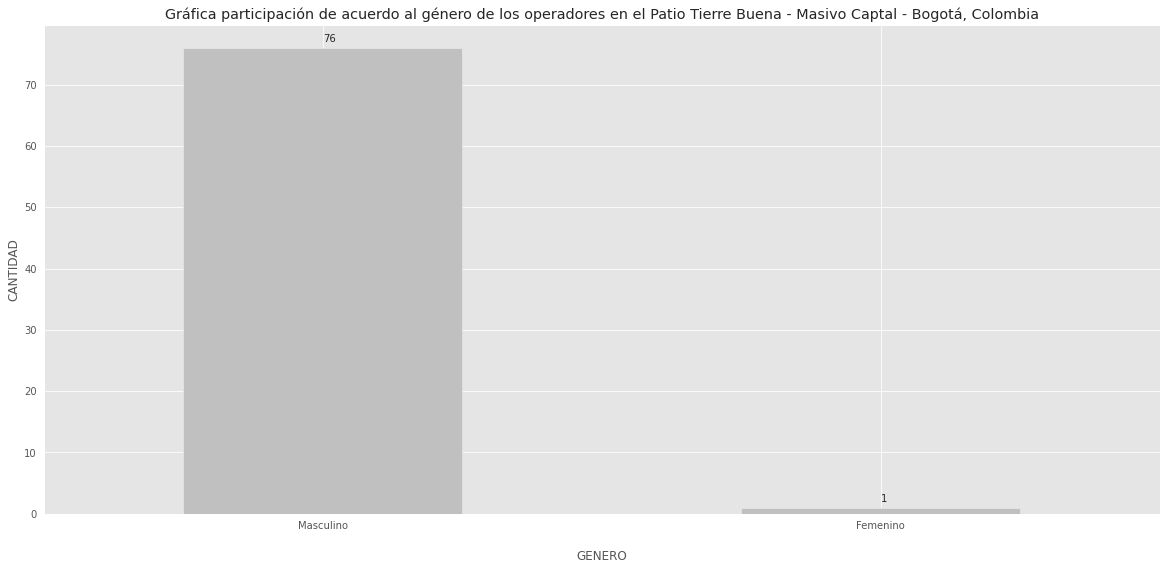

In [ ]:
plt.style.use("ggplot") 
plt.figure(figsize = (20,9))
plt.title("Gráfica participación de acuerdo al género de los operadores en el Patio Tierre Buena - Masivo Captal - Bogotá, Colombia",)
plt.xlabel("\nGENERO") 
plt.ylabel("CANTIDAD") 
tabla_frecuencia["frec_abs"].plot(kind="bar",color = "silver")

for label, annot in enumerate(tabla_frecuencia['frec_abs']):  
  plt.annotate(str(annot),xy=(label,annot + 0.9))

plt.xticks(rotation = 0)
plt.show()

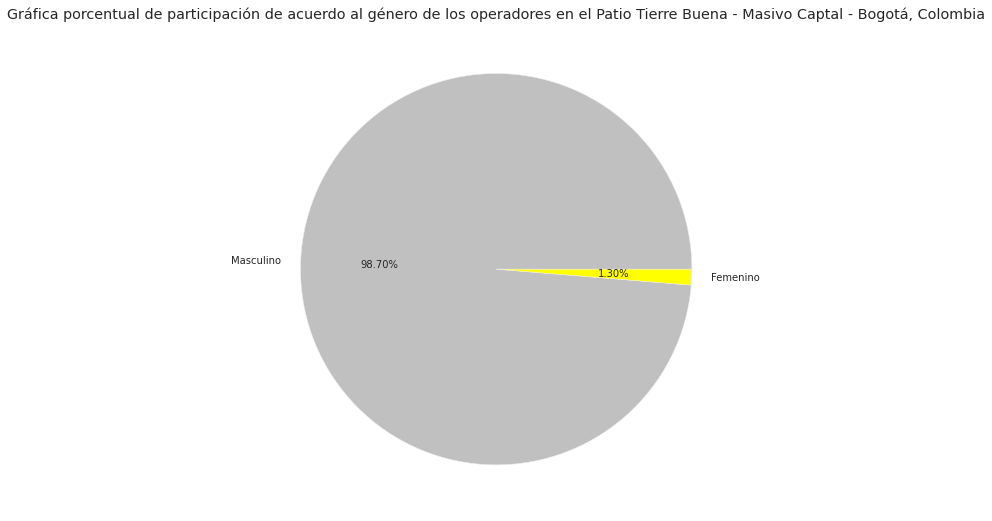

In [ ]:
## pie plot
plt.figure(figsize = (20,9))
plt.pie(tabla_frecuencia['frec_abs'],labels = tabla_frecuencia.index,
        colors = ["silver", "yellow"], autopct='%.2f%%')
plt.title("Gráfica porcentual de participación de acuerdo al género de los operadores en el Patio Tierre Buena - Masivo Captal - Bogotá, Colombia",)
plt.show()

# De la información anterior podemos dar a conocer:

Se observa la presencia de 76 hombres y una mujere en este conjunto de datos, para un total de 77 encuestados. el genero masculino aporto el ***98.7%*** y el femenino el ***1.3%***, es claro que el sesgo esta dado por género másculino, los porcentajes se ajustan de acuerdo a la aproximación por los decimales que toma el software.

In [ ]:
frec_abs_AAB16 = df_inf["ESTRATO"].value_counts()
frec_abs_AAB16.rename("frec_abs_AAB16", inplace = True)
Frecuencia_relativa_AAB16 = df_inf["ESTRATO"].value_counts(normalize = True)
Frecuencia_relativa_AAB16.rename("Frecuencia_relativa_AAB16", inplace = True)
Frecuencia_relativa_porcentual_AAB16= df_inf["ESTRATO"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_AAB16.rename("frec_rela_%", inplace = True)

tabla_frecuencia_AAB16 = pd.concat([frec_abs_AAB16,Frecuencia_relativa_AAB16,Frecuencia_relativa_porcentual_AAB16],axis=1)
total = pd.DataFrame(tabla_frecuencia_AAB16.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia_AAB16,total],axis = 0)

,frec_abs_AAB16,Frecuencia_relativa_AAB16,frec_rela_%
2,51.0,0.662338,66.233766
3,20.0,0.259740,25.974026
1,6.0,0.077922,7.792208
TOTALES,77.0,1.000000,100.000000


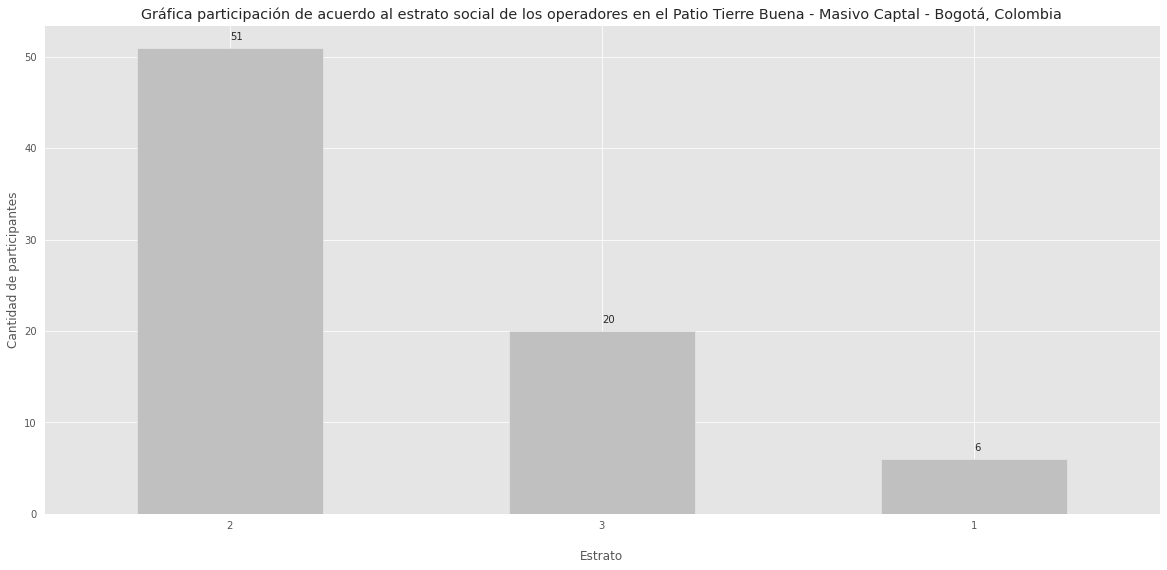

In [ ]:
## Distribución de los estratos

plt.style.use("ggplot")   
plt.figure(figsize = (20,9))
plt.title("Gráfica participación de acuerdo al estrato social de los operadores en el Patio Tierre Buena - Masivo Captal - Bogotá, Colombia",)
plt.xlabel("\nEstrato")      
plt.ylabel("Cantidad de participantes")           
tabla_frecuencia_AAB16["frec_abs_AAB16"].plot(kind="bar",color = "silver")

#ax = plt.axes()        
#ax.yaxis.grid()
#ax.xaxis.grid()

for label, annot in enumerate(tabla_frecuencia_AAB16['frec_abs_AAB16']):  
  plt.annotate(str(annot),xy=(label,annot + 0.9))
#ax.set_facecolor('w')
plt.xticks(rotation = 0)
plt.show()

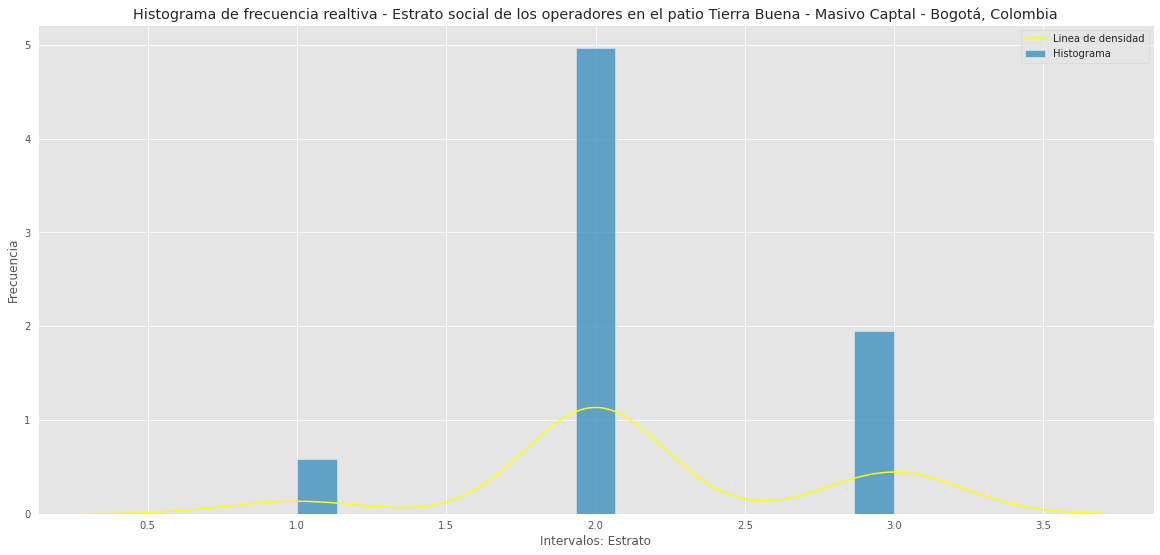

In [ ]:
plt.figure(figsize = (20,9))
sns.histplot(data = df_inf , x = "ESTRATO",bins = 15,stat='density', label = "Histograma")
sns.kdeplot(data = df_inf , x = "ESTRATO", color = "yellow", label = "Linea de densidad")
plt.xlabel("Intervalos: Estrato",)
plt.ylabel("Frecuencia")
plt.title("Histograma de frecuencia realtiva - Estrato social de los operadores en el patio Tierra Buena - Masivo Captal - Bogotá, Colombia",)
plt.legend()
plt.show()

Recuerda que la frecuencia relativa de un intervalo se calcula dividiendo su frecuencia absoluta entre el número total de datos.

In [ ]:
fig = px.scatter(df_inf, x = "PATIO", y = "EDAD", hover_name = "ESTRATO", title= "Gráfica de la distribución del Estrato social y rango de edades de los operadores en el patio Tierra Buena - Masivo Captal - Bogotá, Colombia",
                 color = "ESTRATO", hover_data = {"ESTRATO":True})
fig.show()

# ***Percepción en la conducción***

- ***CONOCE USTED, ¿CUÁLES SON SUS FUNCIONES Y LOS DIFERENTES DESINCENTIVOS RELACIONADOS CON LA OPERACIÓN? (MULTAS POR CONDUCTAS OPERACIONALES, PERIODOS DE RECAPACITACIÓN)***

In [ ]:
frec_abs_DESINCENTIVOS_OPERACION= df_inf["DESINCENTIVOS_OPERACION"].value_counts()
frec_abs_DESINCENTIVOS_OPERACION.rename("frec_abs_DESINCENTIVOS_OPERACION", inplace = True)
Frecuencia_relativa_DESINCENTIVOS_OPERACION = df_inf["DESINCENTIVOS_OPERACION"].value_counts(normalize = True)
Frecuencia_relativa_DESINCENTIVOS_OPERACION.rename("Frecuencia_relativa_DESINCENTIVOS_OPERACION", inplace = True)
Frecuencia_relativa_porcentual_DESINCENTIVOS_OPERACION = df_inf["DESINCENTIVOS_OPERACION"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_DESINCENTIVOS_OPERACION.rename("Frecuencia_relativa_porcentual_DESINCENTIVOS_OPERACION", inplace = True)
tabla_frecuencia = pd.concat([frec_abs_DESINCENTIVOS_OPERACION,Frecuencia_relativa_DESINCENTIVOS_OPERACION,Frecuencia_relativa_porcentual_DESINCENTIVOS_OPERACION],axis=1)
total = pd.DataFrame(tabla_frecuencia.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia,total],axis = 0)

,frec_abs_DESINCENTIVOS_OPERACION,Frecuencia_relativa_DESINCENTIVOS_OPERACION,Frecuencia_relativa_porcentual_DESINCENTIVOS_OPERACION
SI,72.0,0.935065,93.506494
NO,5.0,0.064935,6.493506
TOTALES,77.0,1.000000,100.000000


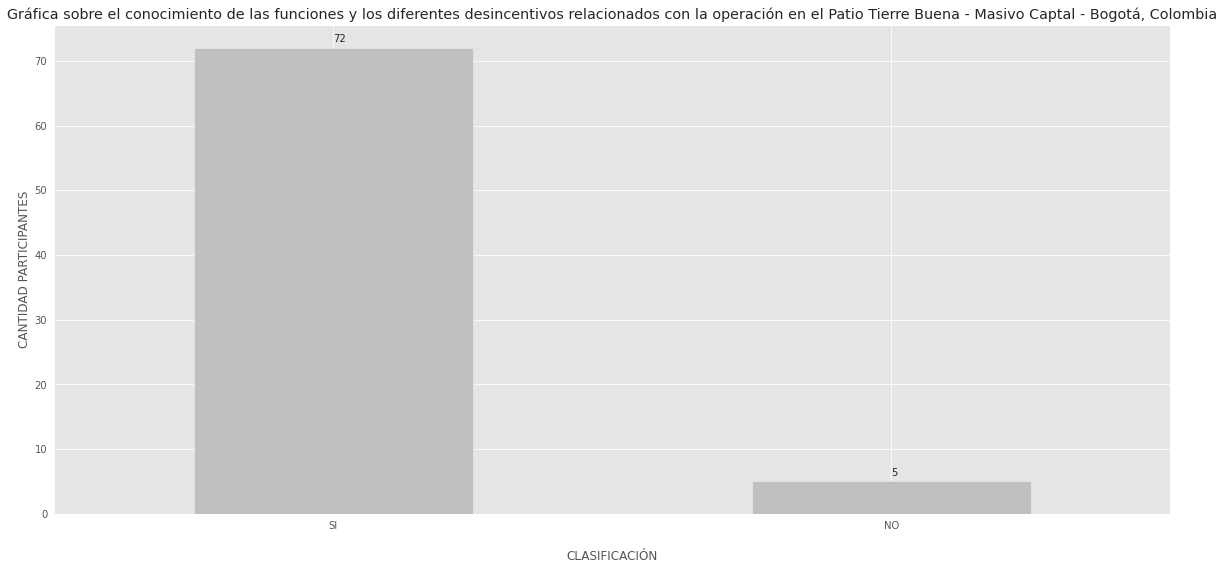

In [ ]:
plt.style.use("ggplot") 
plt.figure(figsize = (20,9))
plt.title("Gráfica sobre el conocimiento de las funciones y los diferentes desincentivos relacionados con la operación en el Patio Tierre Buena - Masivo Captal - Bogotá, Colombia",)
plt.xlabel("\nCLASIFICACIÓN") 
plt.ylabel("CANTIDAD PARTICIPANTES") 
tabla_frecuencia["frec_abs_DESINCENTIVOS_OPERACION"].plot(kind="bar",color = "silver")

for label, annot in enumerate(tabla_frecuencia['frec_abs_DESINCENTIVOS_OPERACION']):  
  plt.annotate(str(annot),xy=(label,annot + 0.9))

plt.xticks(rotation = 0)
plt.show()

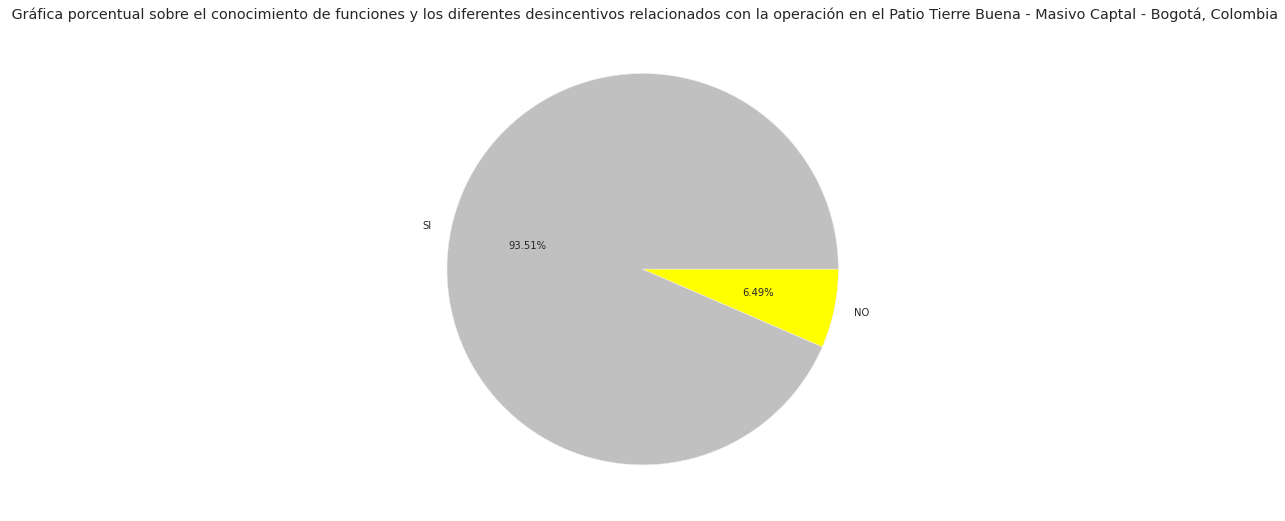

In [ ]:
## pie plot
plt.figure(figsize = (20,9))
plt.pie(tabla_frecuencia['frec_abs_DESINCENTIVOS_OPERACION'],labels = tabla_frecuencia.index,
        colors = ["silver", "Yellow"], autopct='%.2f%%')
plt.title(" Gráfica porcentual sobre el conocimiento de funciones y los diferentes desincentivos relacionados con la operación en el Patio Tierre Buena - Masivo Captal - Bogotá, Colombia",)
plt.show()

In [ ]:
round(pd.crosstab(df_inf['ESTRATO'], df_inf['DESINCENTIVOS_OPERACION'] , normalize = "index"),2)*100

DESINCENTIVOS_OPERACION,NO,SI
ESTRATO,,
1,0.0,100.0
2,8.0,92.0
3,5.0,95.0


In [ ]:
round(pd.crosstab(df_inf['GENERO'], df_inf['DESINCENTIVOS_OPERACION'] , normalize = "index"),2)*100

DESINCENTIVOS_OPERACION,NO,SI
GENERO,,
Femenino,0.0,100.0
Masculino,7.0,93.0


In [ ]:
frec_abs_NIVEL_ACADEMICO = df_inf["NIVEL ACADEMICO"].value_counts()
frec_abs_NIVEL_ACADEMICO.rename("frec_abs_NIVEL_ACADEMICO", inplace = True)
Frecuencia_relativa_NIVEL_ACADEMICO= df_inf["NIVEL ACADEMICO"].value_counts(normalize = True)
Frecuencia_relativa_NIVEL_ACADEMICO.rename("Frecuencia_relativa_NIVEL_ACADEMICO", inplace = True)
Frecuencia_relativa_porcentual_NIVEL_ACADEMICO= df_inf["NIVEL ACADEMICO"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_NIVEL_ACADEMICO.rename("Frecuencia_relativa_porcentual_NIVEL_ACADEMICO", inplace = True)

tabla_frecuencia_NIVEL_ACADEMICO = pd.concat([frec_abs_NIVEL_ACADEMICO,Frecuencia_relativa_NIVEL_ACADEMICO,Frecuencia_relativa_porcentual_NIVEL_ACADEMICO],axis=1)
total = pd.DataFrame(tabla_frecuencia_NIVEL_ACADEMICO.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia_NIVEL_ACADEMICO,total],axis = 0)

,frec_abs_NIVEL_ACADEMICO,Frecuencia_relativa_NIVEL_ACADEMICO,Frecuencia_relativa_porcentual_NIVEL_ACADEMICO
Bachillerato,57.0,0.740260,74.025974
Primaria,11.0,0.142857,14.285714
Técnico,7.0,0.090909,9.090909
Tecnólogo,2.0,0.025974,2.597403
TOTALES,77.0,1.000000,100.000000


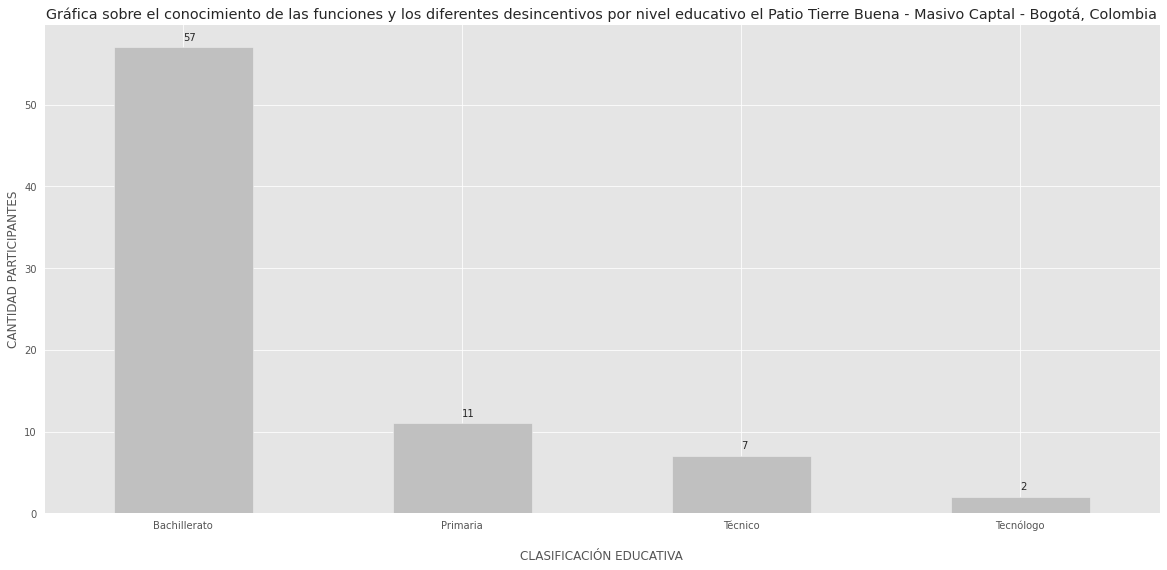

In [ ]:
plt.style.use("ggplot") 
plt.figure(figsize = (20,9))
plt.title("Gráfica sobre el conocimiento de las funciones y los diferentes desincentivos por nivel educativo el Patio Tierre Buena - Masivo Captal - Bogotá, Colombia",)
plt.xlabel("\nCLASIFICACIÓN EDUCATIVA") 
plt.ylabel("CANTIDAD PARTICIPANTES") 
tabla_frecuencia_NIVEL_ACADEMICO ["frec_abs_NIVEL_ACADEMICO"].plot(kind="bar",color = "silver")

for label, annot in enumerate(tabla_frecuencia_NIVEL_ACADEMICO ['frec_abs_NIVEL_ACADEMICO']):  
  plt.annotate(str(annot),xy=(label,annot + 0.9))

plt.xticks(rotation = 0)
plt.show()

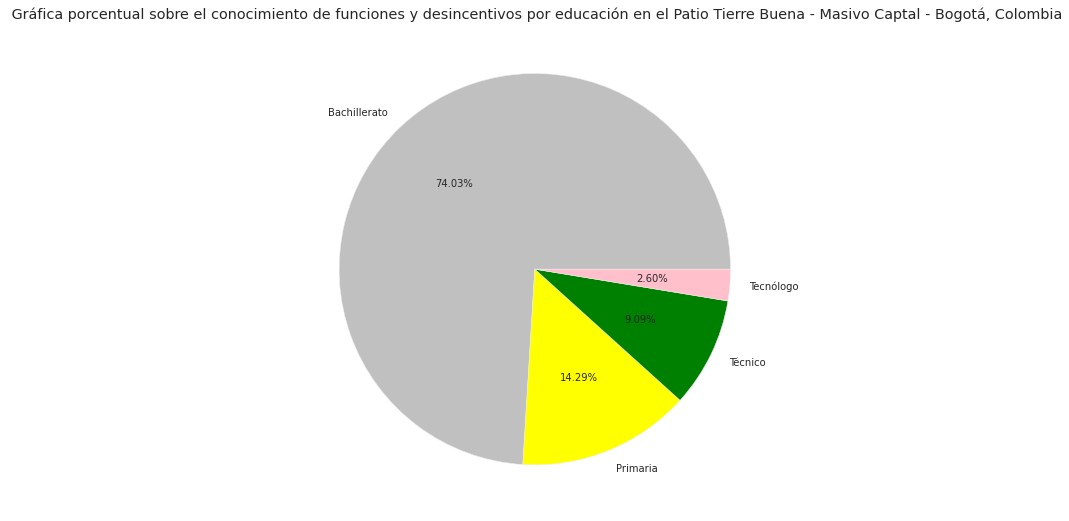

In [ ]:
## pie plot
plt.figure(figsize = (20,9))
plt.pie(tabla_frecuencia_NIVEL_ACADEMICO['frec_abs_NIVEL_ACADEMICO'],labels = tabla_frecuencia_NIVEL_ACADEMICO.index,
        colors = ["silver", "Yellow", "green","pink"], autopct='%.2f%%')
plt.title(" Gráfica porcentual sobre el conocimiento de funciones y desincentivos por educación en el Patio Tierre Buena - Masivo Captal - Bogotá, Colombia",)
plt.show()

In [ ]:
round(pd.crosstab(df_inf['NIVEL ACADEMICO'], df_inf['DESINCENTIVOS_OPERACION'] , normalize = "index"),2)*100

DESINCENTIVOS_OPERACION,NO,SI
NIVEL ACADEMICO,,
Bachillerato,7.0,93.0
Primaria,0.0,100.0
Tecnólogo,0.0,100.0
Técnico,14.0,86.0


*De la tabla de frecuencias y gráficos podemos informar que:*


1. Como se observo anteriormente, los encuestados fueron 77 operadores,  **72** de estos responden conocer sus funciones y los desincentivos derivados de conductas operacionales, estos datos representan el **93.5%**, y tan solo cinco funcionarios con el **6.49%** desconocen la información. 

2. De la población encuestada se separa por estrato social, y se logra identificar que el desconocimiento sobre funciones y desincentivos esta en los estratos dos y tres, el dos con el **8%** y el  tres con **5%** respectivamente.

4. El patio dispone de dos géneros, y de acuerdo al análisis el desconocimiento en su totalidad lo aporta el género másculino ***100%.****

5. De la población encuestada ***57*** funcionarios son bachilleres (74.03%), ***11*** tienen la primaria (14.29%), ***7*** son técnicos (9.09%) y ***2*** funcionarios son tecnólogos (2.60%), en los resultados de la  encuesta no se registran profesionales.

6. Sobre la población académica se puede decir que el desconocimiento de funcione y desincentivos lo apotantan los bachilleres con el 7% y los técnicos con el 14%. 

----------------------------------------------------------------------------------------------------------------------------------------------------------------

- ***¿QUÉ TAN SATISFECHO SE ENCUENTRA CON EL PROTOCOLO DE DESINCENTIVOS RELACIONADOS CON LA OPERACIÓN?***

<Figure size 1440x648 with 0 Axes>

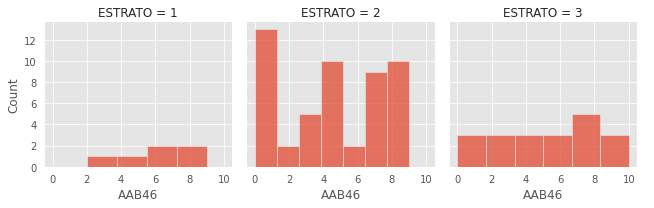

In [ ]:
plt.figure(figsize = (20,9))
g = sns.FacetGrid(df_inf, col="ESTRATO",)
g.map_dataframe(sns.histplot, x="AAB46")
g.add_legend();
plt.show;



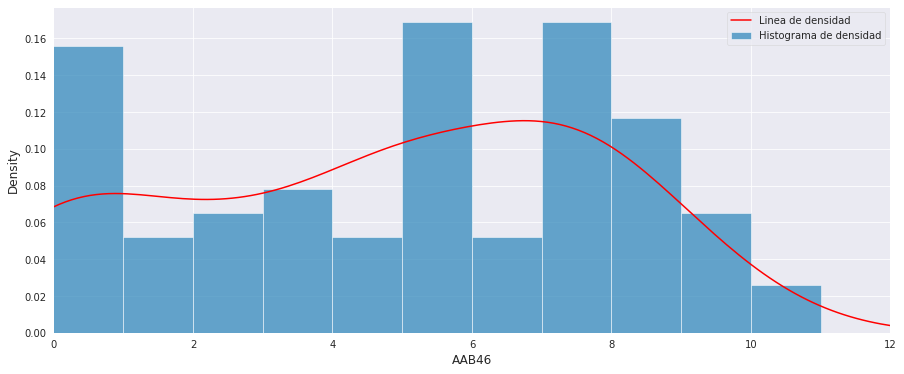

In [ ]:
sns.set_style("darkgrid")   ## Estilo de los plots.
plt.figure(figsize=(15,6))  ## Tamaño al plot
sns.histplot(data = df_inf, x = "AAB46", 
             stat="density",
             bins=range(-2,15), 
             label = "Histograma de densidad")
sns.kdeplot(data = df_inf, x = "AAB46", color = "red", label = "Linea de densidad")
plt.xlim([0,12])
plt.legend()
plt.show()

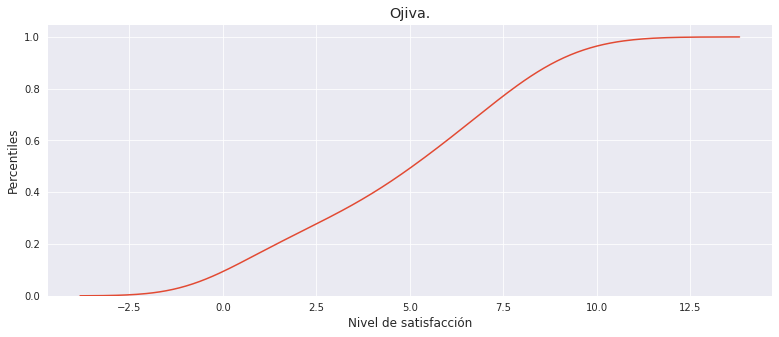

In [ ]:
plt.figure(figsize = (13,5))
sns.kdeplot(data = df_inf , x = "AAB46", cumulative = True)
plt.xlabel("Nivel de satisfacción",)
plt.ylabel("Percentiles")
plt.title("Ojiva.",)
plt.show()

Un gráfico de ojivas se usa para representar la distribución acumulada. Esta identifica los valores de los datos en el eje x (eje horizontal) y las frecuencias acumuladas en el eje y (eje vertical)

In [ ]:
fig = px.box(df_inf, y = "AAB46", color = "ESTRATO", 
             color_discrete_sequence = ["red","skyblue","silver",])
fig.update_layout(xaxis_title = "¿QUÉ TAN SATISFECHO SE ENCUENTRA CON EL PROTOCOLO DE DESINCENTIVOS RELACIONADOS CON LA OPERACIÓN SEPARADOS POR ESTRATO SOCIAL?", yaxis_title = "Nivel de Satisfacción")
fig.show()

- Los estratos "2" y "3" son los más insatisfechos con el protocolo, sin embargo son los estratos que màs aportan a los resultados.

<Figure size 1440x648 with 0 Axes>

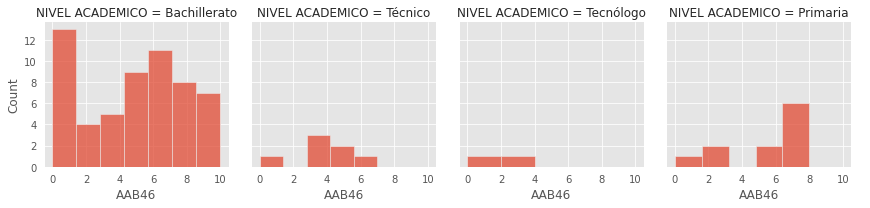

In [ ]:
plt.figure(figsize = (20,9))
g = sns.FacetGrid(df_inf, col="NIVEL ACADEMICO",)
g.map_dataframe(sns.histplot, x="AAB46")
g.add_legend();
plt.show;

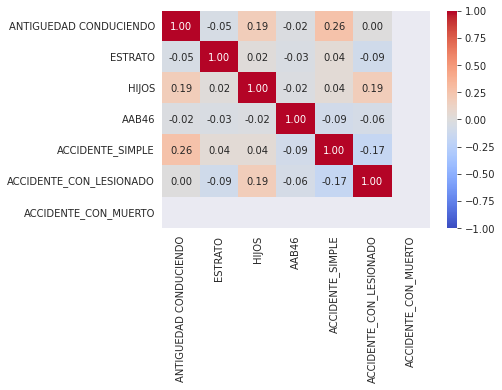

In [ ]:
coef_spearman = df_inf.corr(method="spearman")
sns.heatmap(df_inf.corr(method="spearman"),vmin=-1,cmap='coolwarm',annot=True, fmt=".2f");

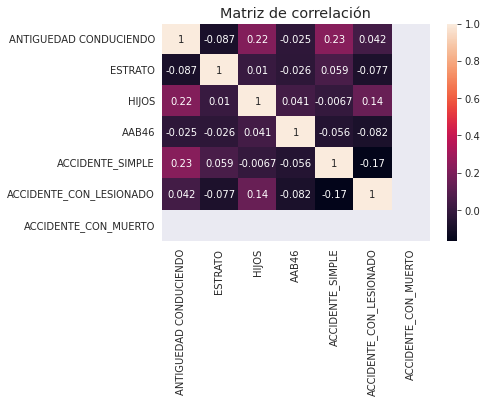

In [ ]:
## Heatmap, matriz de correalción de Pearson.
sns.heatmap(df_inf.corr(), annot=True)
plt.title("Matriz de correlación")
plt.show()